In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [60]:
datas = pd.read_csv("/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/pre_processing_data/data_eda.csv")


In [61]:
datas["Target"] = datas["Target"].map( {
    "Dropout":1,
    "Graduate":0,
    "Enrolled":0
})

In [62]:
X = datas[datas.columns[:-1]].to_numpy()
Y = datas[datas.columns[-1]]

In [64]:
dim = len(X)
models = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=dim, input_shape=(len(datas.columns[:-1]),)),
    tf.keras.layers.Dense(512, activation='leaky_relu'),
    tf.keras.layers.Dense(264, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(16, activation='leaky_relu'),
    tf.keras.layers.Dense(8, activation='leaky_relu'),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(2, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')]
)
models.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 2841)              59661     
                                                                 
 dense_23 (Dense)            (None, 512)               1455104   
                                                                 
 dense_24 (Dense)            (None, 264)               135432    
                                                                 
 dense_25 (Dense)            (None, 128)               33920     
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 16)               

In [65]:
epoch = 200
models.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.0007),
    metrics=['accuracy']
)
history = models.fit(X,Y,validation_split=0.33,epochs=epoch,verbose=2)

Epoch 1/200
60/60 - 4s - loss: 0.5465 - accuracy: 0.6763 - val_loss: 0.6628 - val_accuracy: 0.7527 - 4s/epoch - 71ms/step
Epoch 2/200
60/60 - 2s - loss: 0.4879 - accuracy: 0.7499 - val_loss: 0.5242 - val_accuracy: 0.8156 - 2s/epoch - 30ms/step
Epoch 3/200
60/60 - 2s - loss: 0.4710 - accuracy: 0.7641 - val_loss: 0.6452 - val_accuracy: 0.6290 - 2s/epoch - 30ms/step
Epoch 4/200
60/60 - 2s - loss: 0.4579 - accuracy: 0.7614 - val_loss: 0.7867 - val_accuracy: 0.4094 - 2s/epoch - 32ms/step
Epoch 5/200
60/60 - 2s - loss: 0.4626 - accuracy: 0.7772 - val_loss: 0.7154 - val_accuracy: 0.5011 - 2s/epoch - 30ms/step
Epoch 6/200
60/60 - 2s - loss: 0.4525 - accuracy: 0.7793 - val_loss: 0.7311 - val_accuracy: 0.4776 - 2s/epoch - 32ms/step
Epoch 7/200
60/60 - 2s - loss: 0.4501 - accuracy: 0.7888 - val_loss: 0.7132 - val_accuracy: 0.5384 - 2s/epoch - 32ms/step
Epoch 8/200
60/60 - 2s - loss: 0.4470 - accuracy: 0.7872 - val_loss: 0.8741 - val_accuracy: 0.2996 - 2s/epoch - 30ms/step
Epoch 9/200
60/60 - 2s -

In [66]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_accuracy = history.history["val_accuracy"]

In [67]:
def plot_valid_train(train,valid,title,label_x,label_y,show=True,multi=None):
    epoch=len(train)
    if multi:
        multi.plot(range(1,epoch+1),train,label="Train",color='b')
        multi.plot(range(1,epoch+1),valid,label="Validation",color='g')
        multi.set_title(title)
        multi.set_xlabel(label_x)
        multi.set_ylabel(label_y)
        multi.grid()
        multi.legend()
    else:
        plt.plot(range(1,epoch+1),train,label="Train",color='b')
        plt.plot(range(1,epoch+1),valid,label="Validation",color='g')
        plt.title(title)
        plt.xlabel(label_x)
        plt.ylabel(label_y)
        plt.grid()
        plt.legend()
    if show:
        plt.show()

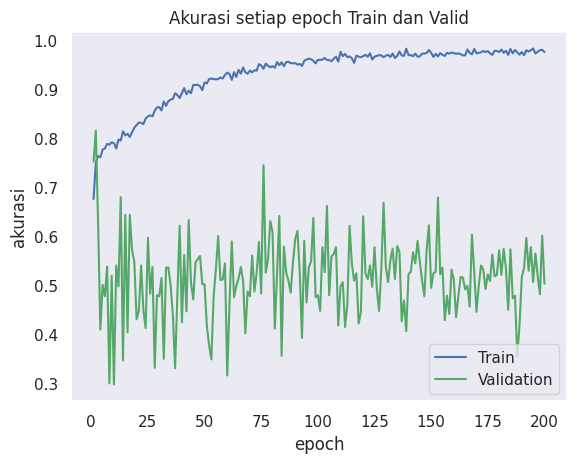

In [68]:
#plot akurasi
plot_valid_train(train_accuracy,valid_accuracy,"Akurasi setiap epoch Train dan Valid","epoch","akurasi")

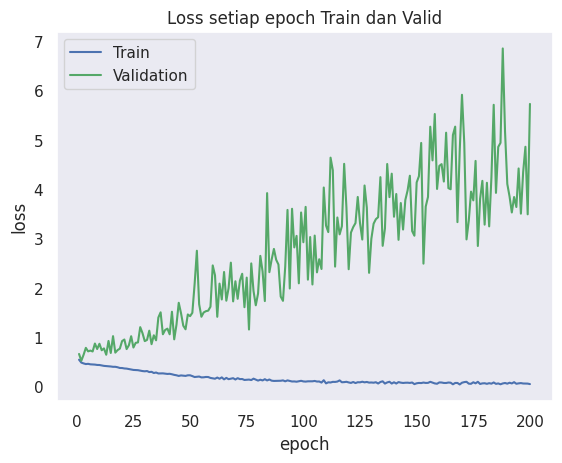

In [69]:
#plot loss
plot_valid_train(train_loss,valid_loss,"Loss setiap epoch Train dan Valid","epoch","loss")

In [70]:
# cross validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=22)

for index_train, index_test in skf.split(X,Y):
    train_x, test_x = X[index_train],X[index_test]
    train_y, test_y = Y[index_train], Y[index_test]

    models.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.0007),
    metrics=['accuracy']
    )

    models.fit(train_x,train_y,epochs=200,verbose=0)
    scores = models.evaluate(test_x,test_y, verbose=0)

    print("Validation accuracy: {:.2f}%".format(scores[1] * 100))


Validation accuracy: 81.37%
Validation accuracy: 85.21%
Validation accuracy: 95.42%
Validation accuracy: 92.43%
Validation accuracy: 94.54%


In [12]:
#save model 
models.save("MLP_Model.h5")

/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
#fungsi model
def iterasi_learningrate_RMSprop(model,step,start,end,down=False):
    histo = []

    lr = start
    if down:
        while lr >= end:
            model.compile(
            loss='binary_crossentropy',
            optimizer=RMSprop(learning_rate=lr),
            metrics=['accuracy']
            )
            history = model.fit(X,Y,validation_split=0.33,epochs=200,verbose=2)
            histo.append(history)
            lr += step
    else:
        while lr <= end:
            model.compile(
            loss='binary_crossentropy',
            optimizer=RMSprop(learning_rate=lr),
            metrics=['accuracy']
            )
            history = model.fit(X,Y,validation_split=0.33,epochs=200,verbose=2)
            histo.append(history)
            lr += step
    
    return histo

def iterasi_learningrate_crossvalidation_RMSprop(x,y,num_fold,model,start,step,end,down=False):
    skf = StratifiedKFold(n_splits=num_fold, shuffle=True,random_state=22)
    akurasi = {}
    
    lr = start
    if down:
        while lr >= end:
            total_akurasi = 0
            for index_train, index_test in skf.split(x,y):
                train_x, test_x = x[index_train],x[index_test]
                train_y, test_y = y[index_train], y[index_test]

                model.compile(
                loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=lr),
                metrics=['accuracy']
                )
                print(f"akursi learning_rate: {lr}")
                models.fit(train_x,train_y,epochs=200,verbose=0)
                scores = models.evaluate(test_x,test_y, verbose=0)
                total_akurasi += scores[1]

                print("Validation accuracy: {:.2f}%".format(scores[1] * 100))
        
            akurasi[lr]=total_akurasi/num_fold
            lr += step
    else:

        while lr <= end:
            total_akurasi = 0
            for index_train, index_test in skf.split(x,y):
                train_x, test_x = x[index_train],x[index_test]
                train_y, test_y = y[index_train], y[index_test]

                model.compile(
                loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=lr),
                metrics=['accuracy']
                )
                print(f"akursi learning_rate: {lr}")
                models.fit(train_x,train_y,epochs=200,verbose=0)
                scores = models.evaluate(test_x,test_y, verbose=0)
                total_akurasi += scores[1]

                print("Validation accuracy: {:.2f}%".format(scores[1] * 100))
        
            akurasi[lr]=total_akurasi/num_fold
            lr += step
    
    return akurasi



In [19]:
histori_akurasi = iterasi_learningrate_RMSprop(models,0.01,0.001,0.051)

Epoch 1/200
60/60 - 4s - loss: 2.2021 - accuracy: 0.6626 - val_loss: 1.5455 - val_accuracy: 0.4499 - 4s/epoch - 59ms/step
Epoch 2/200
60/60 - 1s - loss: 1.8770 - accuracy: 0.6742 - val_loss: 1.7129 - val_accuracy: 0.4307 - 1s/epoch - 24ms/step
Epoch 3/200
60/60 - 2s - loss: 1.6251 - accuracy: 0.7105 - val_loss: 0.5442 - val_accuracy: 0.8220 - 2s/epoch - 25ms/step
Epoch 4/200
60/60 - 1s - loss: 1.5092 - accuracy: 0.7068 - val_loss: 0.7592 - val_accuracy: 0.7580 - 1s/epoch - 24ms/step
Epoch 5/200
60/60 - 1s - loss: 1.6860 - accuracy: 0.6952 - val_loss: 1.9204 - val_accuracy: 0.4158 - 1s/epoch - 24ms/step
Epoch 6/200
60/60 - 1s - loss: 1.3798 - accuracy: 0.7241 - val_loss: 2.0404 - val_accuracy: 0.5160 - 1s/epoch - 24ms/step
Epoch 7/200
60/60 - 1s - loss: 1.4567 - accuracy: 0.7262 - val_loss: 2.2538 - val_accuracy: 0.4318 - 1s/epoch - 23ms/step
Epoch 8/200
60/60 - 2s - loss: 1.3771 - accuracy: 0.7504 - val_loss: 3.9950 - val_accuracy: 0.0970 - 2s/epoch - 29ms/step
Epoch 9/200
60/60 - 2s -

In [21]:
histori_akurasi

In [22]:
akurasi_validasi = iterasi_learningrate_crossvalidation_RMSprop(X,Y,5,models,0.001,0.01,0.051)

akursi learning_rate: 0.001
Validation accuracy: 73.99%
akursi learning_rate: 0.001
Validation accuracy: 87.15%
akursi learning_rate: 0.001
Validation accuracy: 98.06%
akursi learning_rate: 0.001
Validation accuracy: 95.95%
akursi learning_rate: 0.001
Validation accuracy: 96.13%
akursi learning_rate: 0.011
Validation accuracy: 79.44%
akursi learning_rate: 0.011
Validation accuracy: 65.67%
akursi learning_rate: 0.011
Validation accuracy: 53.52%
akursi learning_rate: 0.011
Validation accuracy: 74.30%
akursi learning_rate: 0.011
Validation accuracy: 77.82%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 47.28%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 55.63%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 76.58%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 52.64%
akursi learning_rate: 0.020999999999999998
Validation accuracy: 52.46%
akursi learning_rate: 0.031
Validation accuracy: 57.64%
akursi learning_rate: 0.031
V

In [23]:
akurasi_validasi

{0.001: 0.9025563716888427,
 0.011: 0.7014808535575867,
 0.020999999999999998: 0.5691997230052948,
 0.031: 0.5642336487770081,
 0.041: 0.5371389091014862}

In [47]:
def multiplot(data,title,value,start,step):
    
    num_kolom = 1
    num_rows = len(data)
    

    fig,axes = plt.subplots(num_rows, 1, figsize=(30, 20))
    row = num_rows
    for i, histori in enumerate(data):
        row -= 1
        plot_valid_train(histori.history[value],histori.history[f"val_{value}"],f"lr = {start}","epoch",value,False,axes[i])
        start += step
        #axes[row,col].set_title(kolom)
    
    fig.suptitle( title)


    plt.tight_layout()
    plt.show()

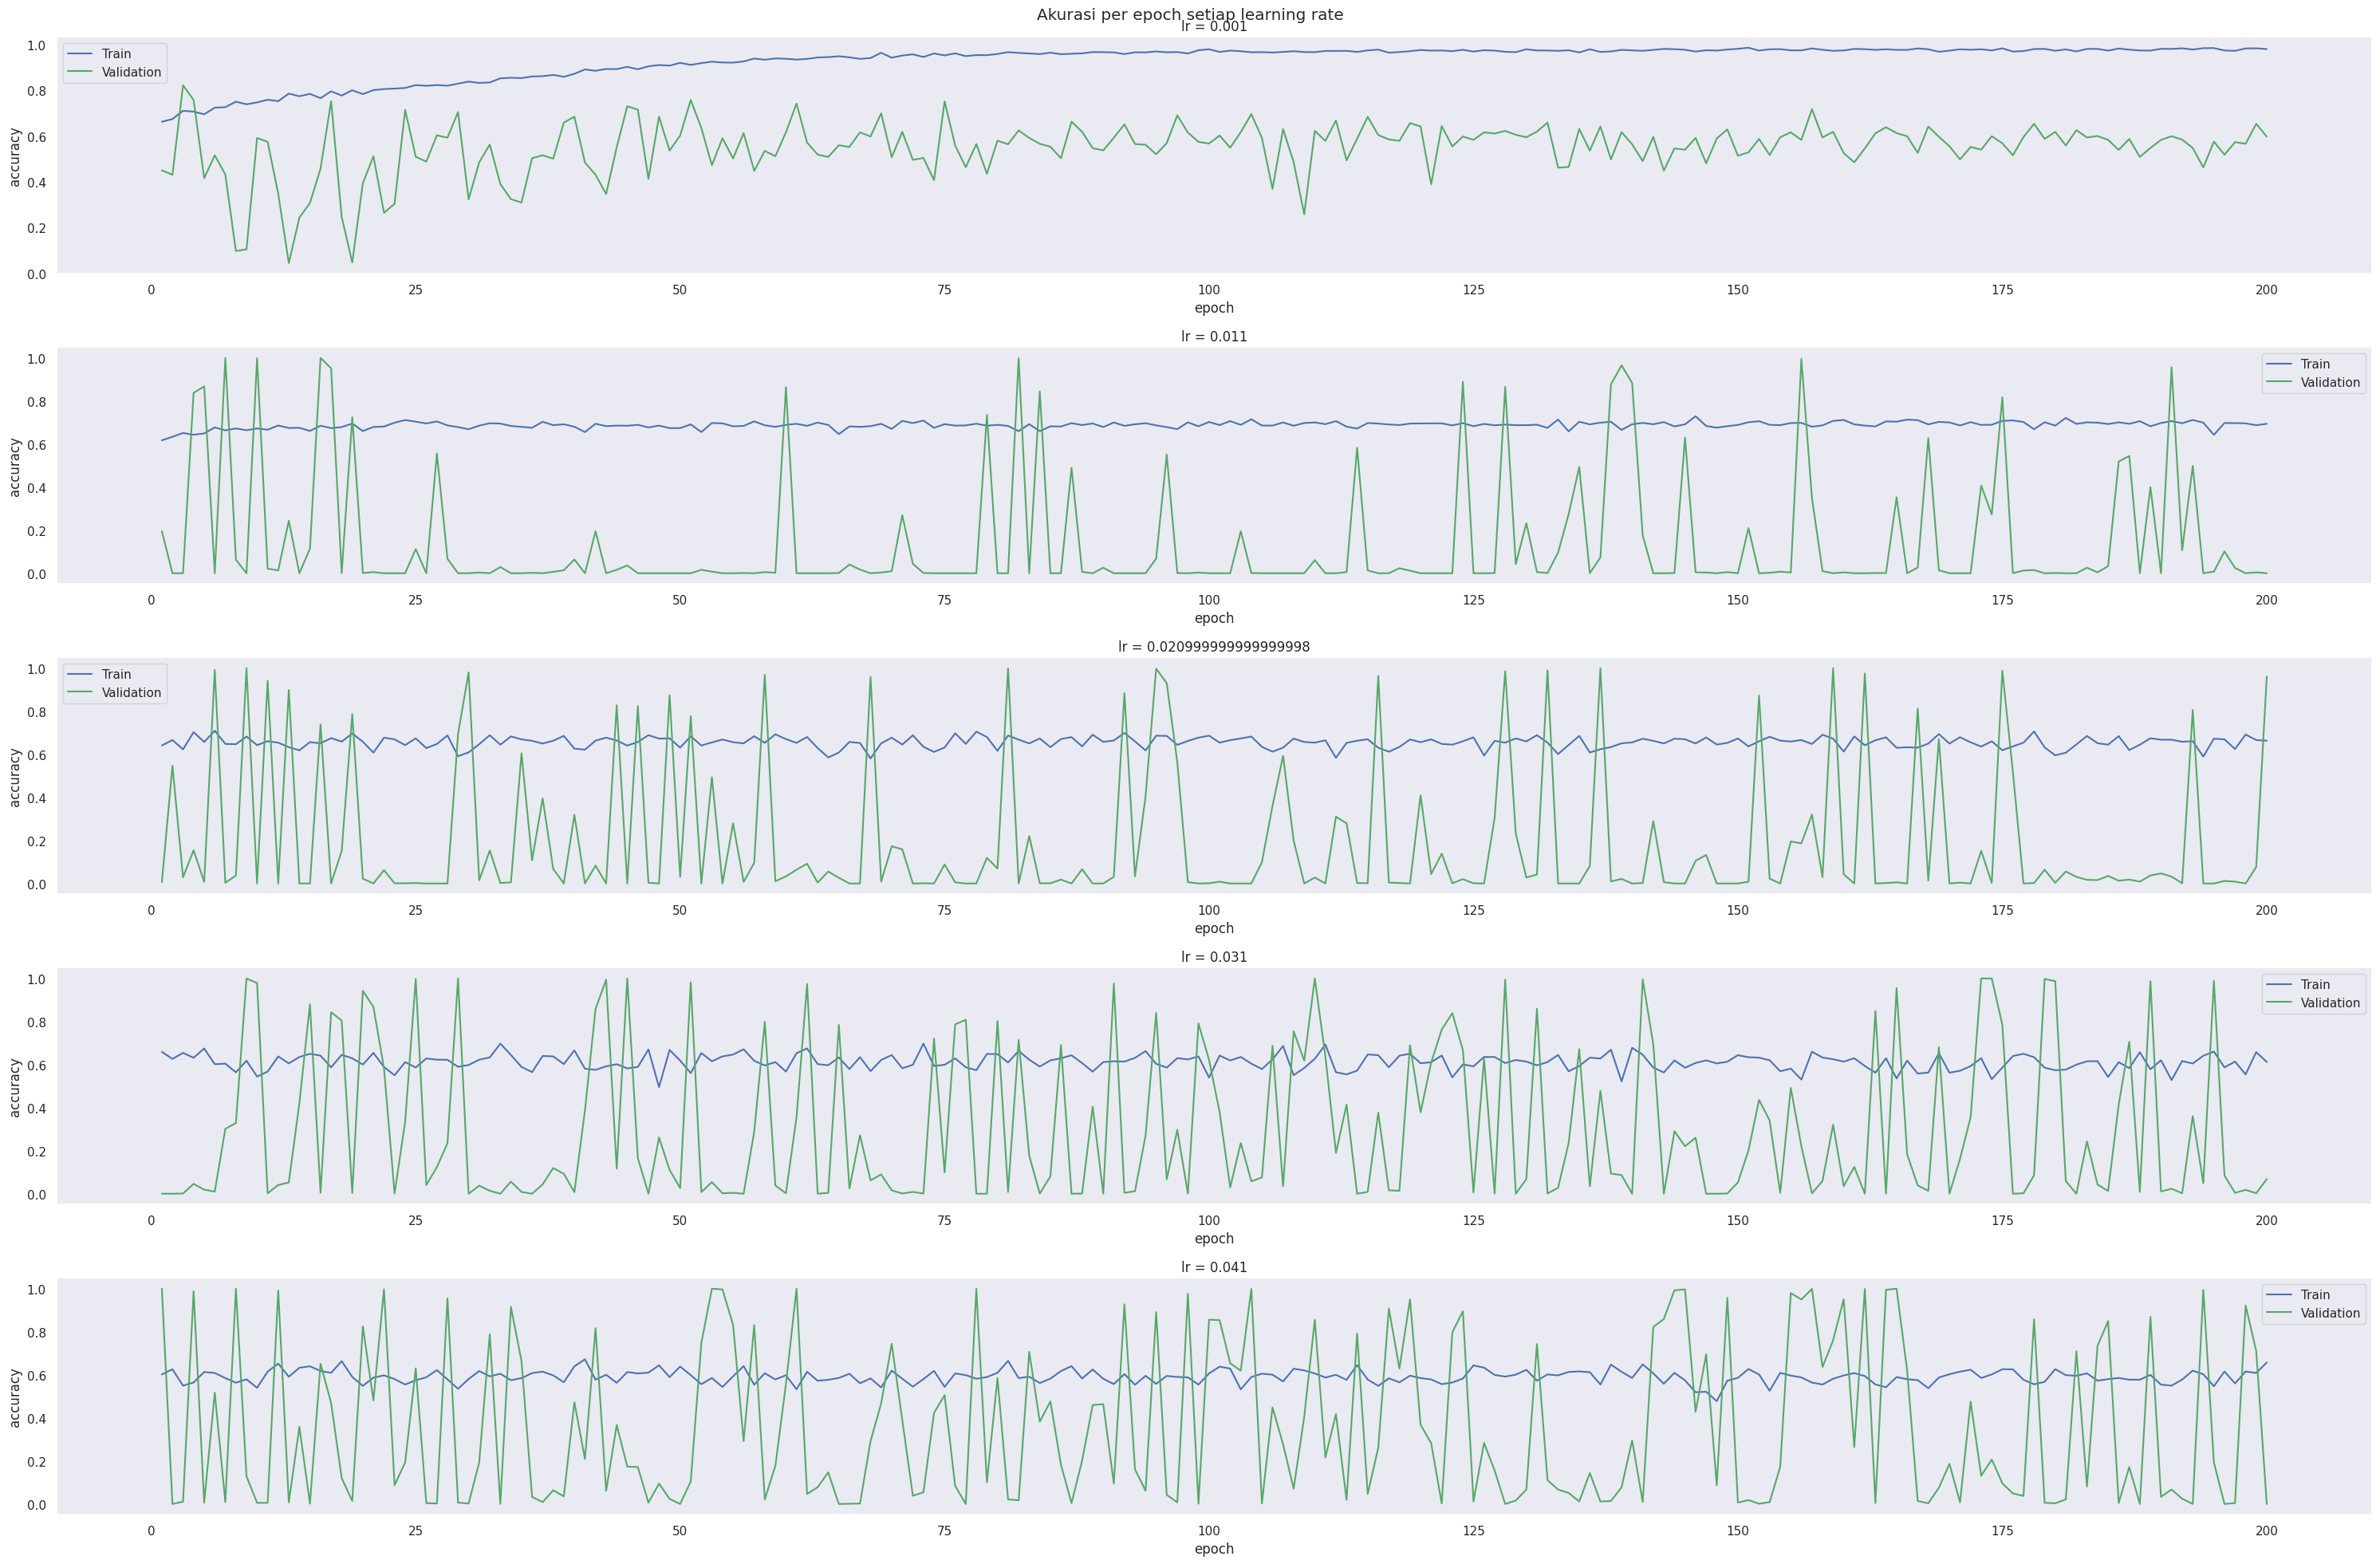

In [48]:
#plot akurasi per epoch
multiplot(histori_akurasi,"Akurasi per epoch setiap learning rate","accuracy",0.001,0.01)

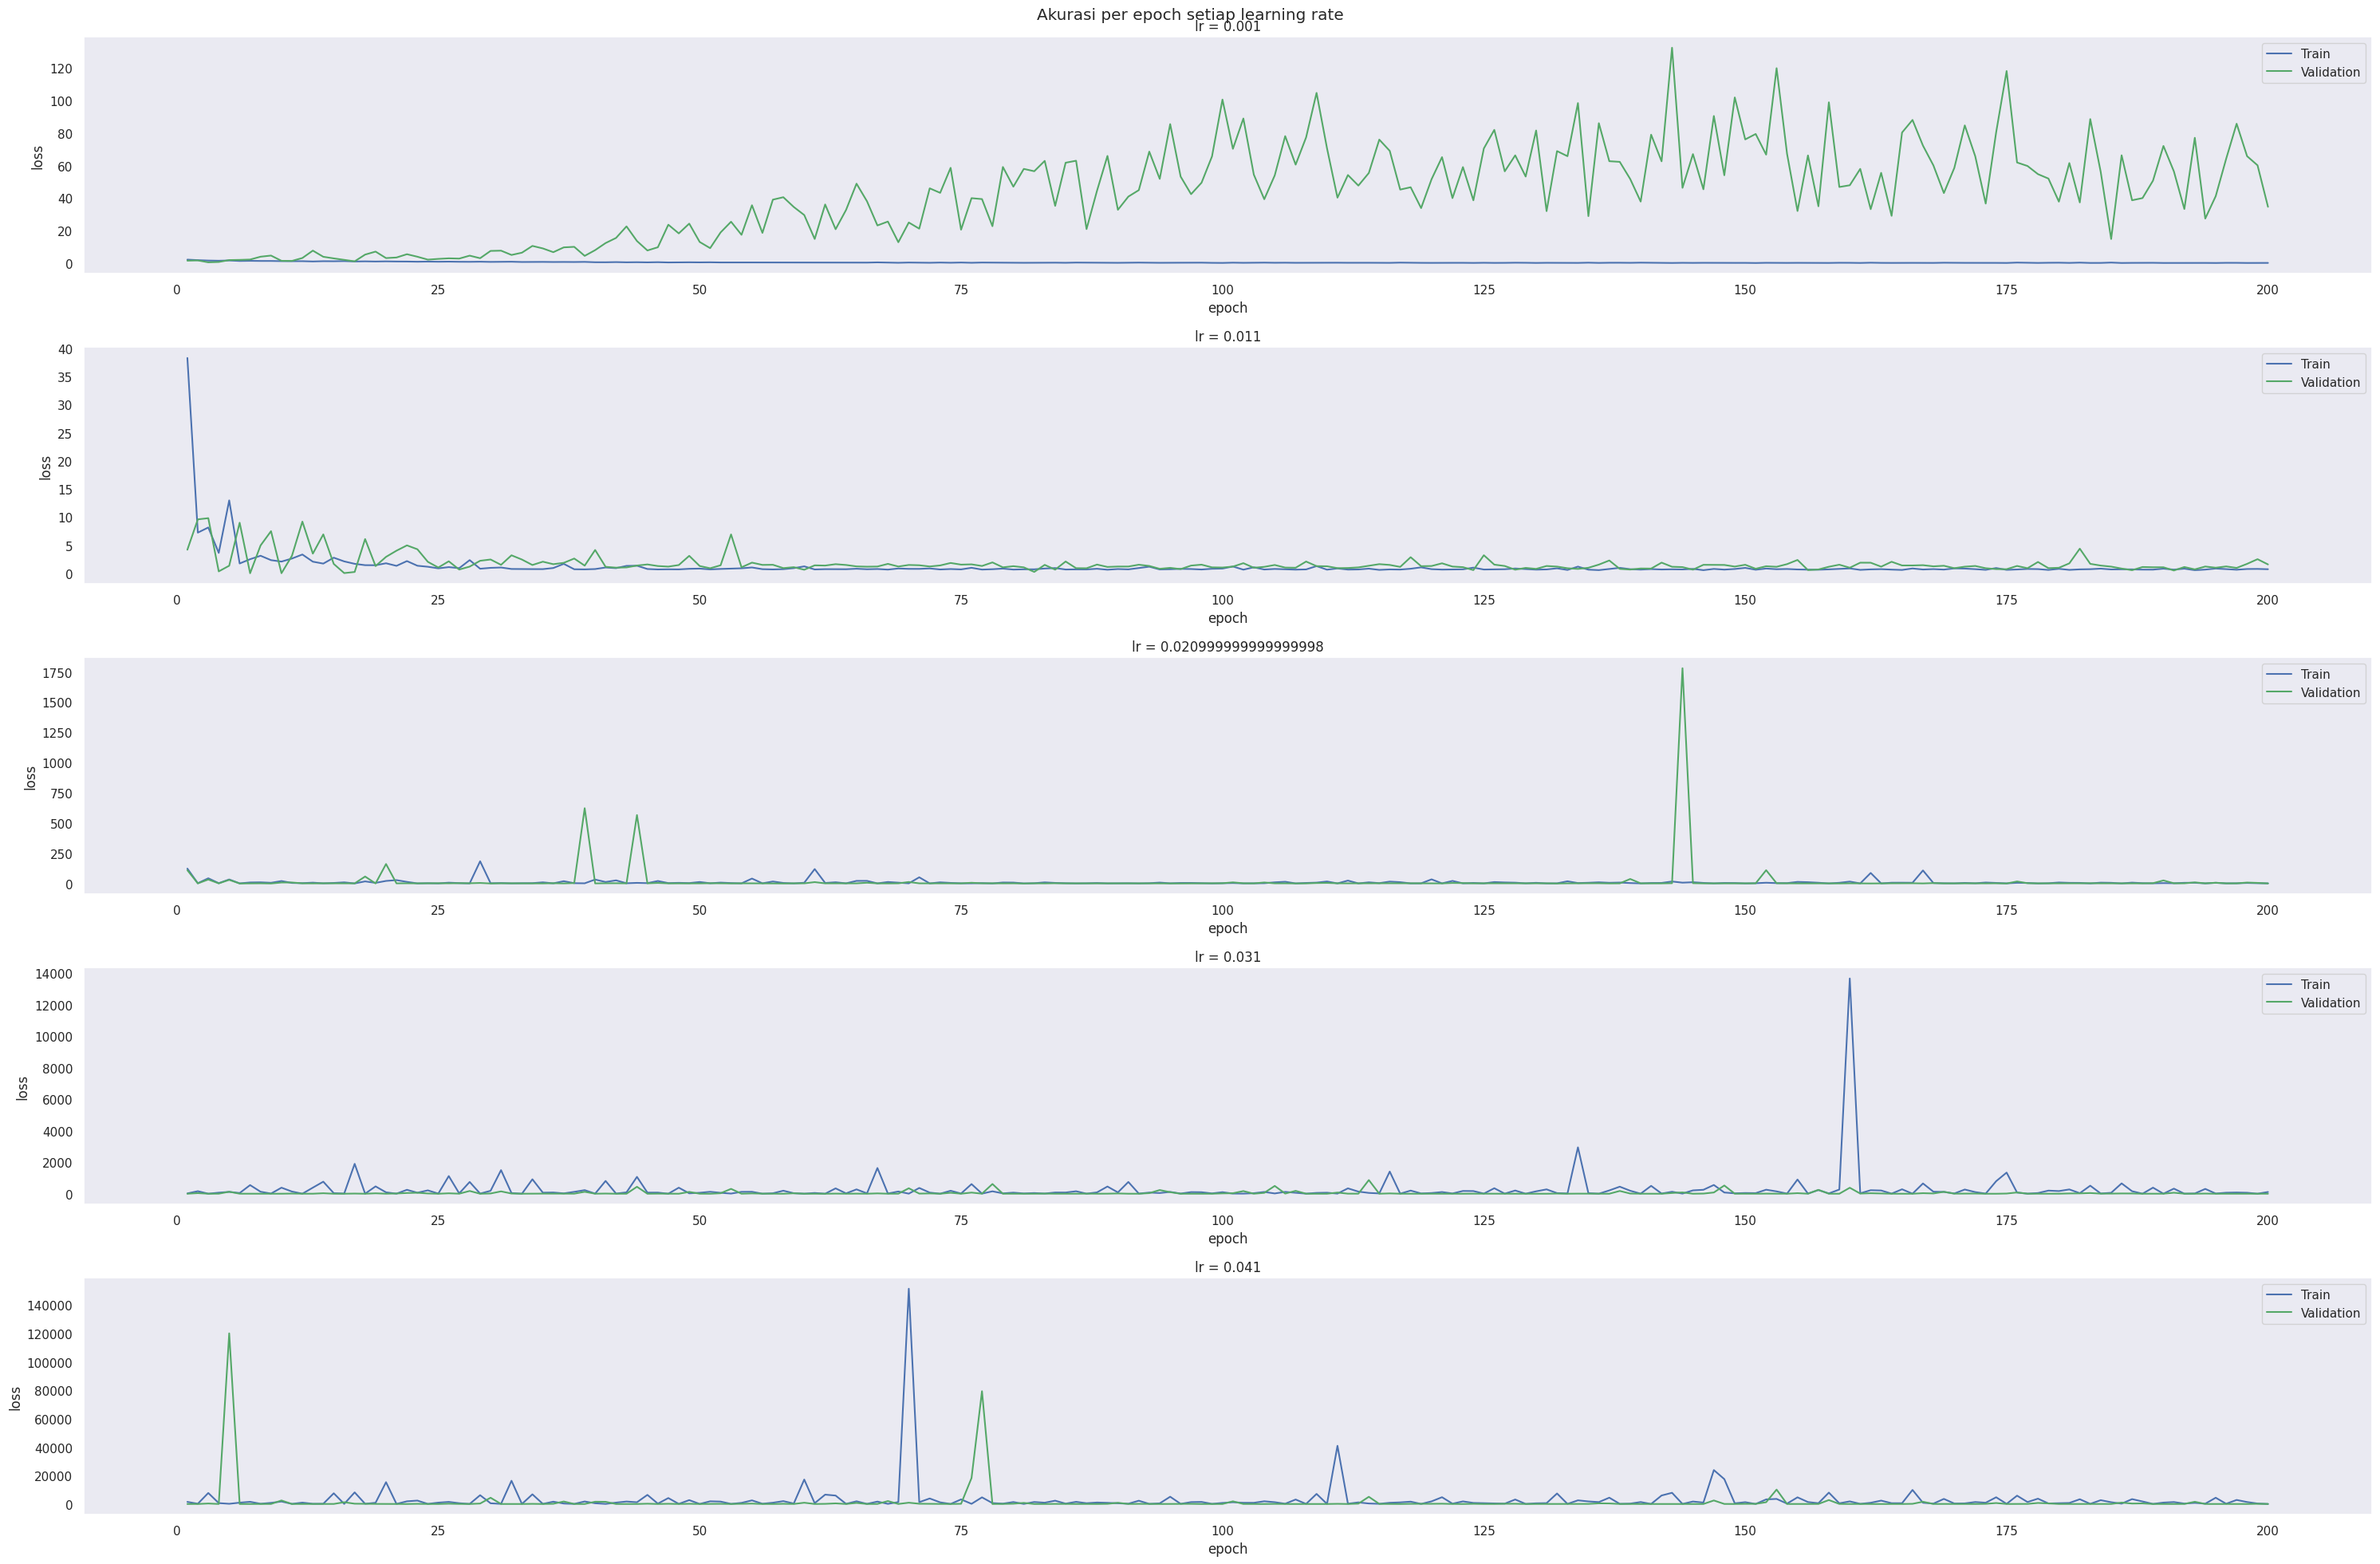

In [49]:
#plot loss per epoch
multiplot(histori_akurasi,"Akurasi per epoch setiap learning rate","loss",0.001,0.01)

In [54]:
histori_akurasi_ = iterasi_learningrate_RMSprop(models,-0.0001,0.001,0.0005,True)

Epoch 1/200
60/60 - 4s - loss: 0.8972 - accuracy: 0.6211 - val_loss: 0.9741 - val_accuracy: 0.5981 - 4s/epoch - 69ms/step
Epoch 2/200
60/60 - 2s - loss: 0.6850 - accuracy: 0.6705 - val_loss: 0.6682 - val_accuracy: 0.7900 - 2s/epoch - 28ms/step
Epoch 3/200
60/60 - 2s - loss: 0.6370 - accuracy: 0.6763 - val_loss: 0.6864 - val_accuracy: 0.7825 - 2s/epoch - 27ms/step
Epoch 4/200
60/60 - 2s - loss: 0.5901 - accuracy: 0.7057 - val_loss: 0.8049 - val_accuracy: 0.7377 - 2s/epoch - 28ms/step
Epoch 5/200
60/60 - 2s - loss: 0.5679 - accuracy: 0.7047 - val_loss: 0.9866 - val_accuracy: 0.6546 - 2s/epoch - 27ms/step
Epoch 6/200
60/60 - 2s - loss: 0.5577 - accuracy: 0.7336 - val_loss: 0.5215 - val_accuracy: 0.8859 - 2s/epoch - 29ms/step
Epoch 7/200
60/60 - 2s - loss: 0.5381 - accuracy: 0.7373 - val_loss: 0.6347 - val_accuracy: 0.8465 - 2s/epoch - 28ms/step
Epoch 8/200
60/60 - 2s - loss: 0.5325 - accuracy: 0.7315 - val_loss: 0.6788 - val_accuracy: 0.8134 - 2s/epoch - 27ms/step
Epoch 9/200
60/60 - 2s -

In [55]:
akurasi_validasi_ = iterasi_learningrate_crossvalidation_RMSprop(X,Y,5,models,0.001,-0.0001,0.0005,True)

akursi learning_rate: 0.001
Validation accuracy: 82.95%
akursi learning_rate: 0.001
Validation accuracy: 91.37%
akursi learning_rate: 0.001
Validation accuracy: 98.06%
akursi learning_rate: 0.001
Validation accuracy: 95.42%
akursi learning_rate: 0.001
Validation accuracy: 95.42%
akursi learning_rate: 0.0009
Validation accuracy: 97.54%
akursi learning_rate: 0.0009
Validation accuracy: 96.48%
akursi learning_rate: 0.0009
Validation accuracy: 99.82%
akursi learning_rate: 0.0009
Validation accuracy: 98.94%
akursi learning_rate: 0.0009
Validation accuracy: 97.36%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 99.30%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 99.12%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 99.65%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 99.65%
akursi learning_rate: 0.0007999999999999999
Validation accuracy: 99.12%
akursi learning_rate: 0.0006999999999999999
Validation accuracy: 99.30%
aku

In [56]:
akurasi_validasi_

{0.001: 0.9264684796333313,
 0.0009: 0.9802903652191162,
 0.0007999999999999999: 0.9936644315719605,
 0.0006999999999999999: 0.9943686723709106,
 0.0005999999999999998: 0.9968328475952148}

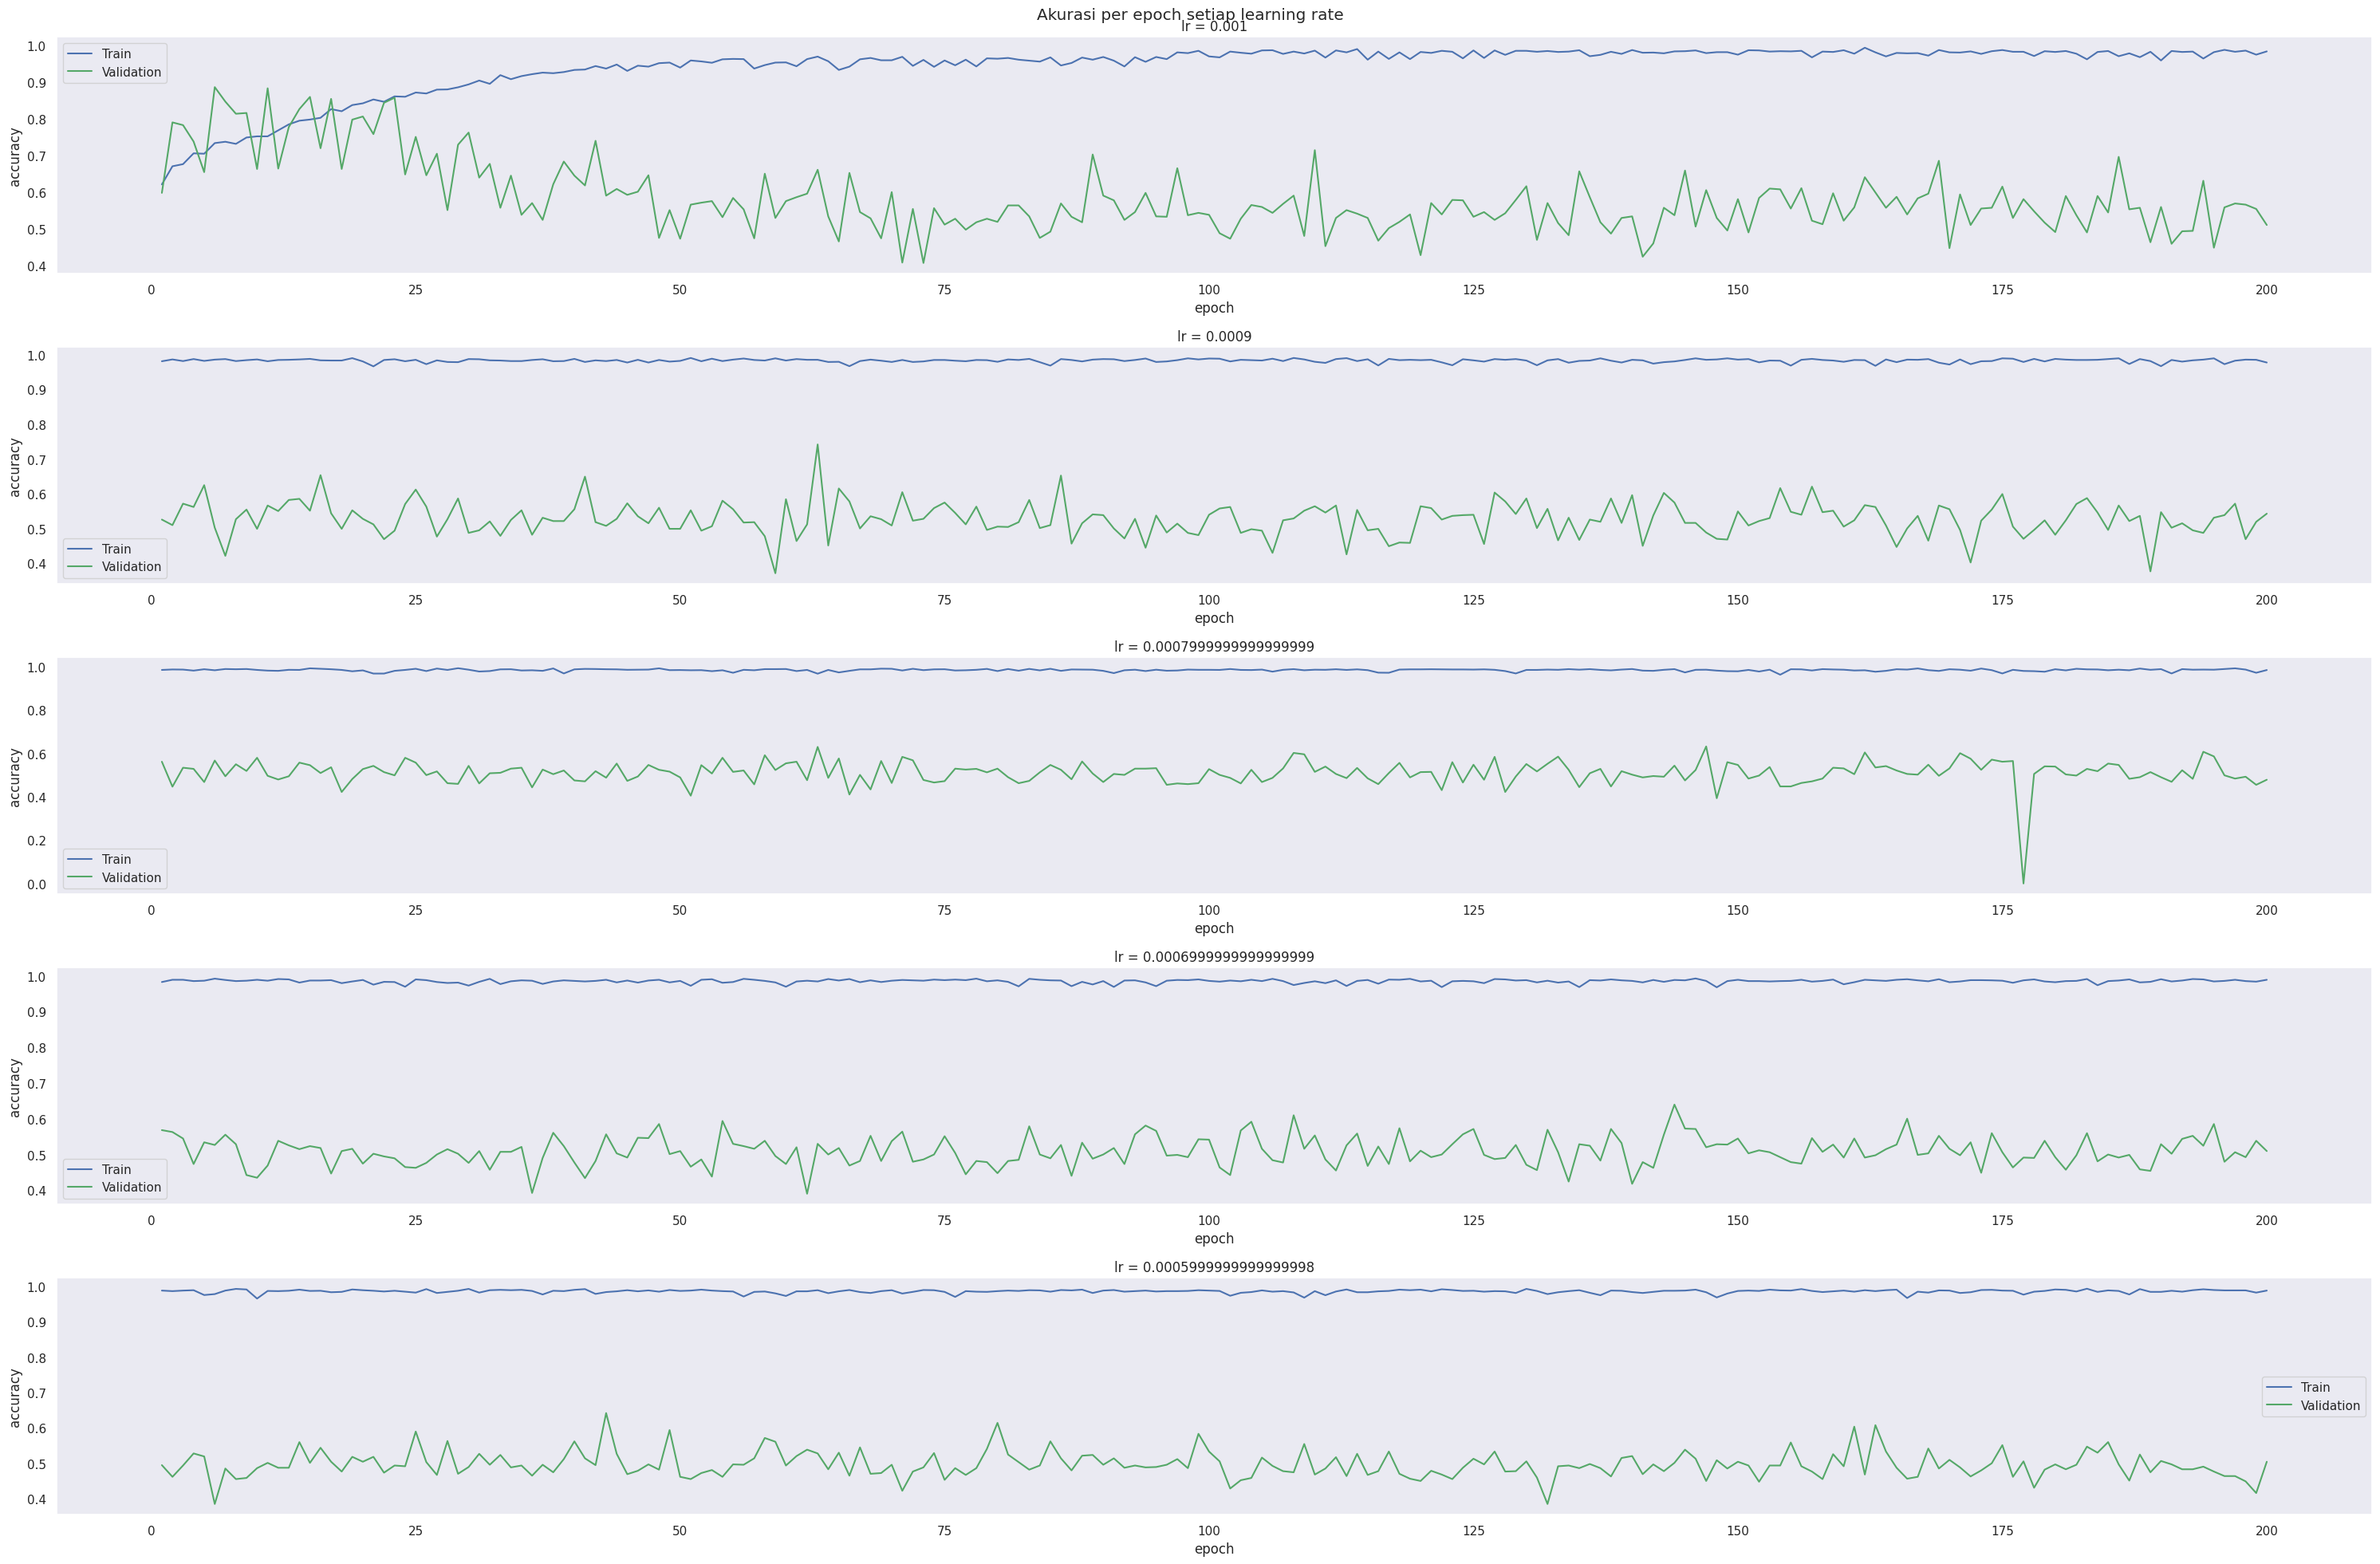

In [57]:
#plot akurasi per epoch
multiplot(histori_akurasi_,"Akurasi per epoch setiap learning rate","accuracy",0.001,-0.0001)

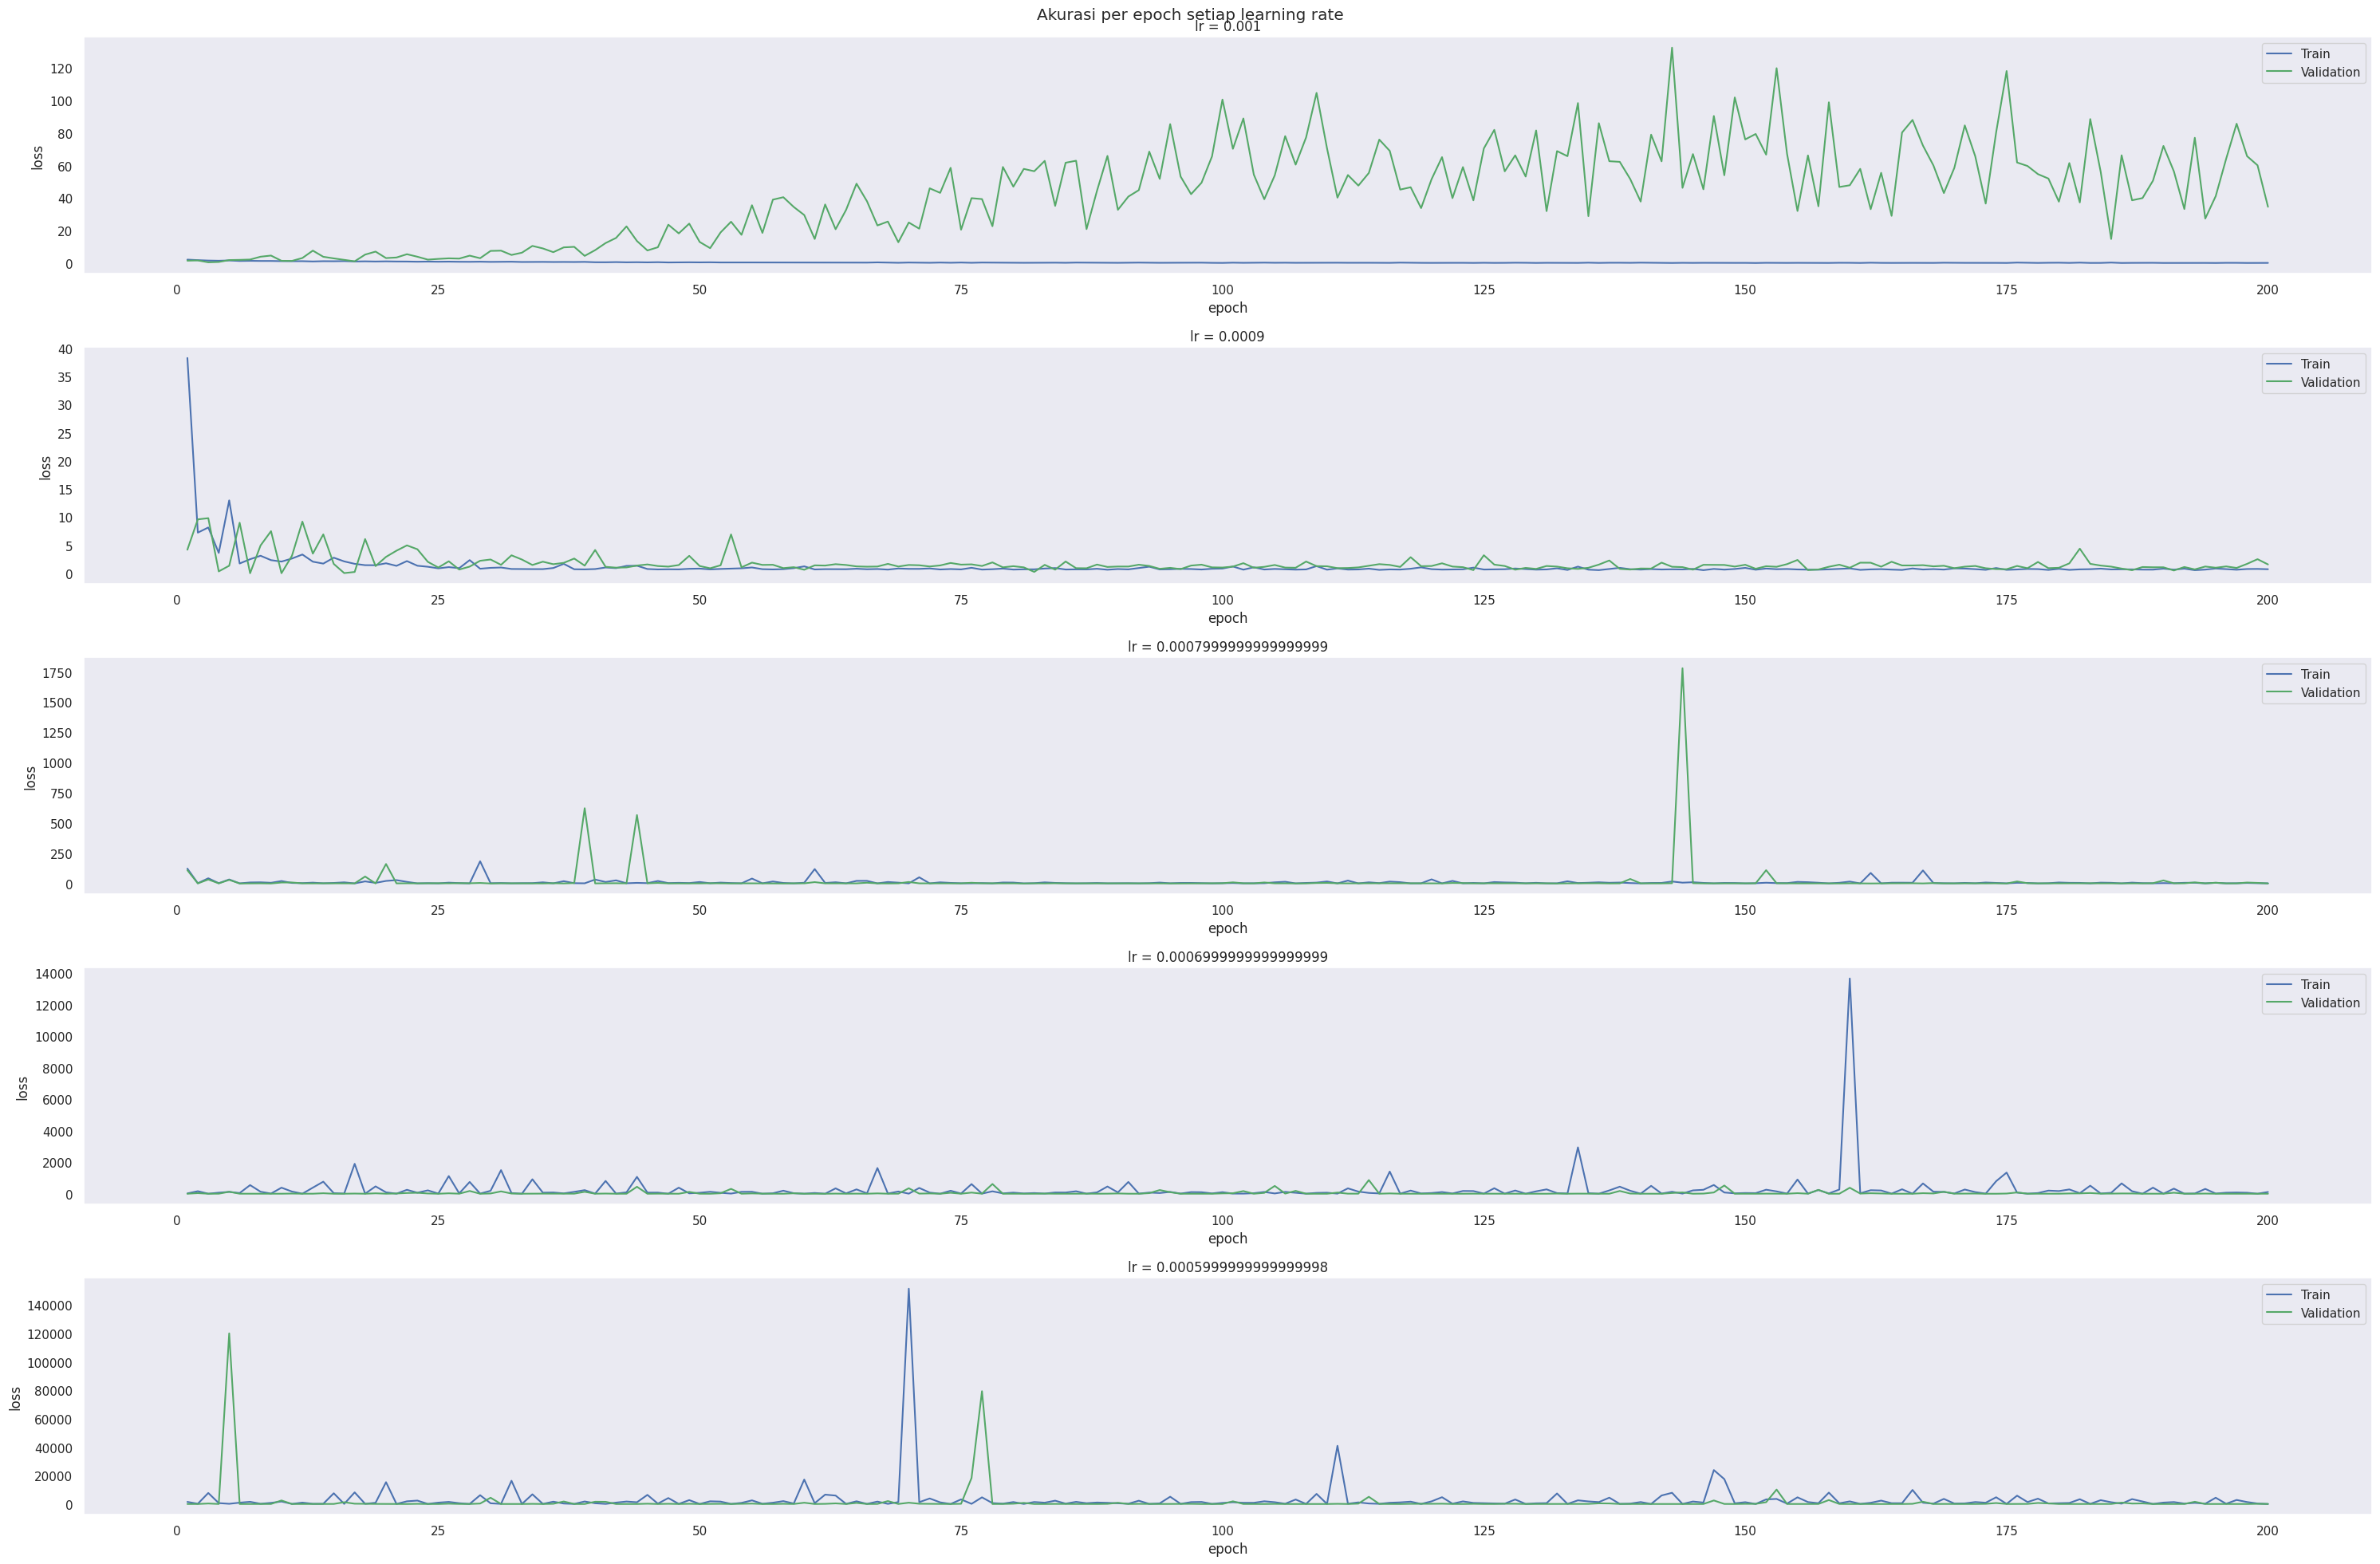

In [58]:
#plot loss per epoch
multiplot(histori_akurasi,"Akurasi per epoch setiap learning rate","loss",0.001,-0.0001)